In [1]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
import pandas as pd

In [2]:
csv_path = "E:/tennis_v2/inference/HRnet_v3_test_02.csv"

In [3]:
trajectory = pd.read_csv(csv_path)
measurements = np.array([trajectory.x, trajectory.y]).T
measurements.shape

(356, 2)

In [4]:
for z in measurements:
    print(z)

[627.67660905  70.08357355]
[601.13650915 101.04802363]
[573.21594525 134.44740733]
[545.25752093 171.69462753]
[518.15409534 209.90875008]
[489.66243476 251.77426277]
[462.36098701 294.20018841]
[434.59211065 340.00344692]
[405.91598205 388.74366713]
[382.9489728  406.93515981]
[358.64688757 410.76790939]
[336.254349   415.70013295]
[310.80336428 423.4828468 ]
[285.91695126 433.67893959]
[261.71251015 445.16506819]
[238.09628117 457.78594873]
[210.54858053 475.90013341]
[192.6409885  484.86877154]
[220.78117046 438.5295799 ]
[246.79962291 398.29470517]
[271.2649366  360.67945034]
[285.00446128 336.15461832]
[312.84291845 297.99143778]
[334.16683488 267.68757296]
[353.19403712 239.259359  ]
[370.99703618 215.90621466]
[387.43516554 194.45577884]
[403.97742821 173.35506428]
[419.58354023 154.53490025]
[434.06152816 137.68914237]
[449.47152597 121.1523947 ]
[463.37385543 107.13747996]
[476.0984267   94.44092486]
[489.3483642   82.20021518]
[500.89503104  72.78401802]
[512.48217489  64.39

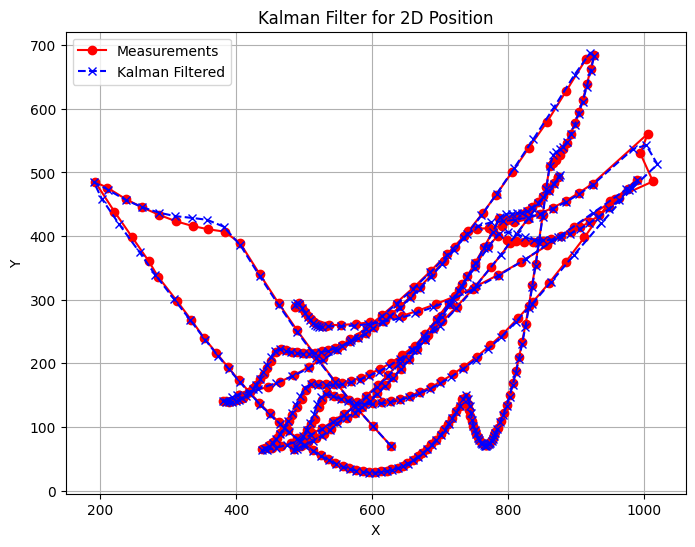

In [12]:
# 创建卡尔曼滤波器
kf = KalmanFilter(dim_x=4, dim_z=2)

# 初始化状态向量 (位置 x, y 和速度 vx, vy)
kf.x = np.array([measurements[0,0],  # 初始 x
                 measurements[0,1],  # 初始 y
                 0.,                  # 初始速度 vx
                 0.])                 # 初始速度 vy

# 状态转移矩阵 F (假设速度在 dt 内不变)
dt = 1.0  # 假设每秒采样一次
kf.F = np.array([[1, 0, dt, 0],  # x = x + vx * dt
                 [0, 1, 0, dt],  # y = y + vy * dt
                 [0, 0, 1, 0],    # vx = vx
                 [0, 0, 0, 1]])   # vy = vy

# 观测矩阵 H (直接测量 x, y)
kf.H = np.array([[1, 0, 0, 0],  # 测量的 x 是状态向量的第 1 项
                 [0, 1, 0, 0]]) # 测量的 y 是状态向量的第 2 项

# 过程噪声协方差矩阵 Q (可以根据实际情况调整)
kf.Q = np.eye(4) * 0.1  # 过程噪声较小

# 测量噪声协方差矩阵 R (假设测量噪声较小)
kf.R = np.eye(2) * 0.5  # 测量噪声

# 初始协方差矩阵 P (较大的值，表示初始不确定)
kf.P *= 1000

# 用于存储滤波后的结果
filtered_positions = []

for z in measurements:  # z 形如 [x, y]
    kf.predict()
    kf.update(z)
    filtered_positions.append(kf.x[:2])

filtered_positions = np.array(filtered_positions)

# 对比原始测量和滤波结果
plt.figure(figsize=(8,6))
plt.plot(measurements[:,0], measurements[:,1], 'ro-', label='Measurements')
plt.plot(filtered_positions[:,0], filtered_positions[:,1], 'bx--', label='Kalman Filtered')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kalman Filter for 2D Position')
plt.legend()
plt.grid(True)
plt.show()